## Carry trade strategy 

In [4]:
#importing packages
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
from fredapi import Fred
import statsmodels.formula.api as smf
import datetime
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import scipy.optimize as optimize

In [74]:
df = pd.read_excel('/Users/Dhriti/Desktop/ex_rates.xlsx', index_col = 0, parse_dates = True)
irs = pd.read_excel('/Users/Dhriti/Desktop/Hw3_Interest_Rates.xlsx', index_col = 0, parse_dates = True)

In [75]:
#This is the exchange rate 
df

,Australia,Canada,Euro Area,Japan,New Zealand,Norway,Sweden,Switzerland,United Kingdom
2000-02-01,1.627869,1.4496,1.029442,110.18,2.056978,8.3184,8.7150,1.64880,0.627865
2000-03-01,1.651528,1.4494,1.046792,105.85,1.995211,8.4670,8.6700,1.66880,0.626920
2000-04-01,1.692334,1.4801,1.100715,106.55,2.052967,8.9681,8.9275,1.73270,0.637714
2000-05-01,1.743679,1.4965,1.074922,106.65,2.179124,8.9272,8.9950,1.68800,0.668986
2000-06-01,1.670565,1.4806,1.046463,105.40,2.137666,8.5653,8.8125,1.62630,0.661288
...,...,...,...,...,...,...,...,...,...
2022-09-01,1.537988,1.3707,1.025851,144.74,1.744300,10.8600,11.1811,0.97620,0.903669
2022-10-01,1.557632,1.3649,1.008675,148.24,1.721500,10.3900,10.9956,0.99920,0.866739
2022-11-01,1.492983,1.3508,0.963763,138.80,1.610800,9.8900,10.5383,0.95060,0.832570
2022-12-01,1.476015,1.3603,0.937559,132.65,1.578500,9.8600,10.4273,0.92325,0.828638


In [76]:
#This is the interest rate 
irs

,United States,Euro Area,Canada,Australia,Switzerland,United Kingdom,Japan,Norway,New Zealand,Sweden
date,,,,,,,,,,
2000-02-01,0.004875,0.002901,0.004333,0.004709,0.002012,0.004985,NaN,0.004781,0.004812,0.003193
2000-03-01,0.004978,0.003070,0.004395,0.004781,0.002349,0.004983,NaN,0.004868,0.005073,0.003322
2000-04-01,0.005088,0.003214,0.004482,0.004899,0.002663,0.005036,NaN,0.005049,0.005254,0.003266
2000-05-01,0.005427,0.003564,0.004770,0.005112,0.002596,0.005048,NaN,0.005262,0.005474,0.003242
2000-06-01,0.005442,0.003676,0.004794,0.005049,0.002787,0.004980,NaN,0.005435,0.005560,0.003225
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,0.002636,0.000839,0.003106,0.002271,NaN,0.002393,-0.000017,0.002418,0.002984,0.001250
2022-10-01,0.003153,0.001182,0.003459,0.002426,NaN,0.002782,-0.000013,0.002734,0.003274,0.001324
2022-11-01,0.003643,0.001508,0.003572,0.002515,NaN,0.002887,-0.000013,0.002879,0.003466,0.001389


In [28]:
df["United States"] = 1
df.columns

Index(['Australia', 'Canada', 'Euro Area', 'Japan', 'New Zealand', 'Norway',
       'Sweden', 'Switzerland', 'United Kingdom', 'United States'],
      dtype='object')

In [29]:
df = df[["United States", 'Euro Area']]

In [30]:
df.columns

Index(['United States', 'Euro Area'], dtype='object')

In [31]:
irs

,United States,Euro Area,Canada,Australia,Switzerland,United Kingdom,Japan,Norway,New Zealand,Sweden
date,,,,,,,,,,
2000-02-01,0.004875,0.002901,0.004333,0.004709,0.002012,0.004985,NaN,0.004781,0.004812,0.003193
2000-03-01,0.004978,0.003070,0.004395,0.004781,0.002349,0.004983,NaN,0.004868,0.005073,0.003322
2000-04-01,0.005088,0.003214,0.004482,0.004899,0.002663,0.005036,NaN,0.005049,0.005254,0.003266
2000-05-01,0.005427,0.003564,0.004770,0.005112,0.002596,0.005048,NaN,0.005262,0.005474,0.003242
2000-06-01,0.005442,0.003676,0.004794,0.005049,0.002787,0.004980,NaN,0.005435,0.005560,0.003225
...,...,...,...,...,...,...,...,...,...,...
2022-09-01,0.002636,0.000839,0.003106,0.002271,NaN,0.002393,-0.000017,0.002418,0.002984,0.001250
2022-10-01,0.003153,0.001182,0.003459,0.002426,NaN,0.002782,-0.000013,0.002734,0.003274,0.001324
2022-11-01,0.003643,0.001508,0.003572,0.002515,NaN,0.002887,-0.000013,0.002879,0.003466,0.001389


In [32]:
irs = irs[["United States", 'Euro Area']]
irs

,United States,Euro Area
date,,
2000-02-01,0.004875,0.002901
2000-03-01,0.004978,0.003070
2000-04-01,0.005088,0.003214
2000-05-01,0.005427,0.003564
2000-06-01,0.005442,0.003676
...,...,...
2022-09-01,0.002636,0.000839
2022-10-01,0.003153,0.001182
2022-11-01,0.003643,0.001508


In [51]:
# calculate the currencies with the highest and lowest yields each period
maxI = irs.idxmax(axis = 1)
minI = irs.idxmin(axis = 1)

In [52]:
ex= pd.DataFrame([maxI, minI]).T
ex.columns = ["High Yield", "Low Yield"]
ex

,High Yield,Low Yield
date,,
2000-02-01,United States,Euro Area
2000-03-01,United States,Euro Area
2000-04-01,United States,Euro Area
2000-05-01,United States,Euro Area
2000-06-01,United States,Euro Area
...,...,...
2022-09-01,United States,Euro Area
2022-10-01,United States,Euro Area
2022-11-01,United States,Euro Area


In [35]:
profits = np.array([])
for j in range(len(df)-1):
    
    # identify the country with the highest (long)
    # and lowest (short) yield
    long = maxI[j]
    short = minI[j]
    
    # get the exchange rate at t0 and t+1
    # for the short
    sts0 = df[short][j]
    sts1 = df[short][j+1]
    
    # get the monthly interest rate
    # for the short
    si = irs[short][j]
    
    # calculate the amount owed
    owed = 10000*sts0*si/sts1
    
    # get the exchange rate at t0 and t+1
    # for the long
    stl0 = df[long][j]
    stl1 = df[long][j+1]
    
    # get the monthly interest rate for the long
    li = irs[long][j]
    
    # calculate the ending balance
    balance = 10000*stl0*li/stl1
    
    # calculate the profit
    profit = balance - owed
    
    # store the profits
    profits = np.append(profits, profit)
    
    print(profit)
    
    
profits = pd.DataFrame(profits, index = irs.index[:-1], columns = ["Profit"])

20.22916290257338
20.58362605327386
17.976983025858274
17.655060295389823
18.866713968195924
17.905820576734016
15.13539697626495
15.406686050990643
11.580064399237614
9.356143889999686
12.018875740397284
6.944874646224484
5.762641406511349
1.2567009105620812
-0.48899717397323883
4.943391456300105
6.911464389458182
8.164138351445732
6.922422146748442
8.674454348360086
9.996087802700494
10.758877406959268
11.783877357444448
13.065216405765542
12.745299432205352
12.953673256191436
13.681833936455464
15.183372190799437
12.911622998154057
13.329323267709512
13.284289956989575
12.635676135656128
12.646963957212026
15.606492948550986
13.844088523236506
12.537282981950252
11.834264423604795
11.101550068057437
11.890107131956006
9.015993245246216
8.963009605965235
8.263568308969525
9.880285857192325
8.719055657286711
9.13565447128282
9.557500657775865
8.246499167192322
8.504582801879062
8.118167821234806
7.663700382687896
8.314698367496066
7.212382181350618
5.1852016776777905
4.578922839138409

In [36]:
Cumulative_Yearly = profits.Profit.resample('Y').sum().cumsum()
Cumulative_Yearly

date
2000-12-31     176.714534
2001-12-31     258.344467
2002-12-31     420.232320
2003-12-31     539.377092
2004-12-31     600.497622
2005-12-31     730.857850
2006-12-31     929.119653
2007-12-31    1019.137276
2008-12-31    1175.448557
2009-12-31    1243.382806
2010-12-31    1293.168575
2011-12-31    1400.403543
2012-12-31    1430.984642
2013-12-31    1436.881276
2014-12-31    1448.367405
2015-12-31    1472.958874
2016-12-31    1563.519147
2017-12-31    1711.432683
2018-12-31    1960.437196
2019-12-31    2214.541618
2020-12-31    2303.900071
2021-12-31    2369.947555
2022-12-31    2554.176711
Freq: A-DEC, Name: Profit, dtype: float64

In [37]:
rorY = profits.Profit.resample('Y').sum()/10000*100
rorY.head()

date
2000-12-31    1.767145
2001-12-31    0.816299
2002-12-31    1.618879
2003-12-31    1.191448
2004-12-31    0.611205
Freq: A-DEC, Name: Profit, dtype: float64

In [38]:
profits

,Profit
date,
2000-02-01,20.229163
2000-03-01,20.583626
2000-04-01,17.976983
2000-05-01,17.655060
2000-06-01,18.866714
...,...
2022-08-01,19.513585
2022-09-01,17.836146
2022-10-01,19.159555


In [77]:
##total return
total_return= Cumulative_Yearly[-2]/10000
tr = total_return*100
print("Total Return is %.2f%%"%tr)

Total Return is 23.70%


In [40]:
##annualised return
P = 10000
A = P + Cumulative_Yearly[-2]
T = len(profits)/12
tt = ((A/P)**(1/T)-1)*100
print("Annualized Rate of Return is %.2f%%"%tt)

Annualized Rate of Return is 0.93%


In [44]:
##Sharpe ratio
rf_rate = pd.read_excel('/Users/Dhriti/Desktop/1-year-treasury-rate-yield-chart.xlsx', index_col = 0, parse_dates = True)

In [57]:
ratio = pd.merge_asof(profits,rf_rate, left_index = True, right_index = True )
ratio

,Profit,value
date,,
2000-02-01,20.229163,6.30
2000-03-01,20.583626,6.17
2000-04-01,17.976983,6.28
2000-05-01,17.655060,6.24
2000-06-01,18.866714,6.32
...,...,...
2022-08-01,19.513585,2.98
2022-09-01,17.836146,3.51
2022-10-01,19.159555,4.05


In [60]:
ratio['Profit'] = ratio[["Profit"]].copy()
ratio["risk_free"] = (ratio[[' value']].dropna()/100+1)**(1/12)-1
ratio['excess_return'] = ratio['Profit'] - ratio['risk_free']
ratio

,Profit,value,risk_free,excess_return
date,,,,
2000-02-01,20.229163,6.30,0.005104,20.224059
2000-03-01,20.583626,6.17,0.005002,20.578624
2000-04-01,17.976983,6.28,0.005088,17.971895
2000-05-01,17.655060,6.24,0.005057,17.650003
2000-06-01,18.866714,6.32,0.005120,18.861594
...,...,...,...,...
2022-08-01,19.513585,2.98,0.002450,19.511135
2022-09-01,17.836146,3.51,0.002879,17.833267
2022-10-01,19.159555,4.05,0.003314,19.156241


In [62]:
sharpe = ratio['excess_return'].mean()/ratio['excess_return'].std()
sharpe

1.441230963843749

In [64]:
##alpha and beta
import yfinance as yf
sp500 = yf.download("^GSPC")[["Adj Close"]]
sp500

[*********************100%***********************]  1 of 1 completed


,Adj Close
Date,
1927-12-30 00:00:00-05:00,17.660000
1928-01-03 00:00:00-05:00,17.760000
1928-01-04 00:00:00-05:00,17.719999
1928-01-05 00:00:00-05:00,17.549999
1928-01-06 00:00:00-05:00,17.660000
...,...
2023-05-01 00:00:00-04:00,4167.870117
2023-05-02 00:00:00-04:00,4119.580078
2023-05-03 00:00:00-04:00,4090.750000


In [65]:
rf_rate = rf_rate.resample("M").first()
data = pd.merge_asof(profits, sp500,left_index = True, right_index = True)
data = data.rename(columns = {'Adj Close':'sp500', 'Profit': 'Profit_With_no_Reinvestment'})
data = pd.merge_asof(data, rf_rate,left_index = True, right_index = True)

In [66]:
# converting the rf to monthly 
data[" value"] = (data[[' value']].dropna()/100+1)**(1/12)-1

In [67]:
index = data.index 
ex_return = pd.DataFrame(index = index)
ex_return['Profit'] = data['Profit_With_no_Reinvestment']-data[' value']
ex_return['sp500'] = data['sp500']-data[' value']
ex_return.columns

Index(['Profit', 'sp500'], dtype='object')

In [68]:
import statsmodels.formula.api as smf 
smf.ols('Profit~sp500', data =ex_return).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.032
Method:                 Least Squares   F-statistic:                     10.18
Date:                Sun, 07 May 2023   Prob (F-statistic):            0.00159
Time:                        23:53:50   Log-Likelihood:                -897.02
No. Observations:                 275   AIC:                             1798.
Df Residuals:                     273   BIC:                             1805.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.9126      0.837      8.264      0.000       5.266       8.559
sp500          0.0013      0.000      3.190      0.002       0.000       0.002
==============================================================================
Omnibus:                       60.686   Durbin-Watson:                   0.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               16.050
Skew:                           0.295   Prob(JB):                     0.000327
Kurtosis:                       1.974   Cond. No.                     4.60e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.6e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
##alpha is 6.9127 and beta is 0.0013!!

In [69]:
### Gini coefficient 
returns = ratio[['Profit']]
returns.columns = ['returns']

In [70]:
def GINI_COEF(returns):
    # get the number of periods -> will allow us to calculate the areas
    periods = len(returns)
    
    # sort values and sum to calculate the lorenz curve
    LorenzCurve = np.cumsum(returns.sort_values( by = "returns"))
    # start from 0
    LorenzCurve = pd.DataFrame({ 'returns': [0]}).append(LorenzCurve)
    Line = LorenzCurve.copy()
    # Form the line that encompasses A and B
    Line["returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["returns"])
    
    # calculate the area of A+B
    UpArea = 0
    for i in range(1,len(returns)):
        UpArea = UpArea + ((Line.iloc[i,:] - LorenzCurve.iloc[i,:] + Line.iloc[i-1,:] - LorenzCurve.iloc[i-1,:]) / 2)
    # calculate the area of A+B+C
    if min(LorenzCurve["returns"]) < 0:
        AllArea = (np.abs(min(LorenzCurve["returns"])) * periods) + ((max(LorenzCurve["returns"]) * periods)/2)
    else:
        AllArea = ((max(LorenzCurve["returns"]) * periods)/2)
    gini = UpArea / AllArea
    return(gini[0])

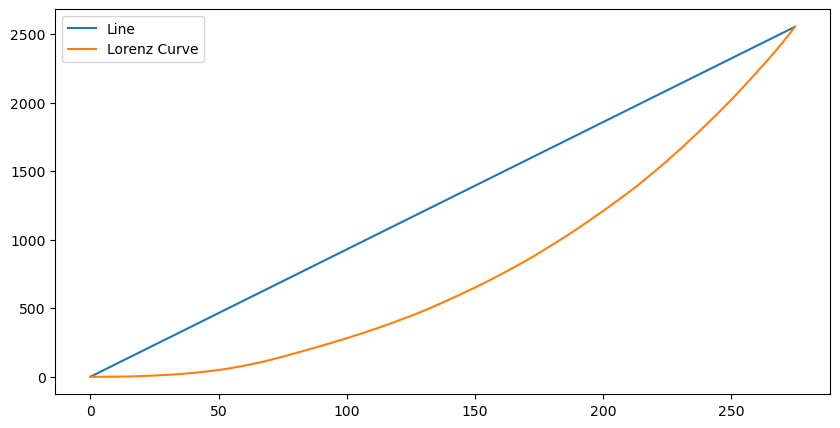

In [71]:
periods = len(returns)
LorenzCurve = np.cumsum(returns.sort_values( by = "returns"))
# start from 0
LorenzCurve = pd.DataFrame({ 'returns': [0]}).append(LorenzCurve)
Line = LorenzCurve.copy()
Line["returns"] = np.arange(0,1+1/periods, 1/periods)*max(LorenzCurve["returns"])
plt.figure(figsize = (10, 5))
plt.plot(Line["returns"].values)
plt.plot(LorenzCurve["returns"].values)
plt.legend(["Line", "Lorenz Curve"])

In [78]:
GINI_COEF(returns)

0.3942283532171276